In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
maldf = pd.read_csv("nsl-binary-results.csv")
print('size of malware results', len(maldf))

size of malware results 54649


In [3]:
maldf.columns

Index(['dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc'], dtype='object')

In [4]:
maldf.iloc[maldf['accuracy'].idxmax()]

dimred       pca_with_varthresh_0.93_autoencoder_0_3
modeltype                                   bayesian
accuracy                                    0.831042
precision                                    0.92414
recall                                      0.766072
f1                                          0.837715
mcc                                         0.677462
Name: 24348, dtype: object

In [5]:
maldf.sort_values('mcc').tail(10)

,dimred,modeltype,accuracy,precision,recall,f1,mcc
517,pca_with_varthresh_0.9_autoencoder_4_9,nn_3,0.814674,0.959541,0.704122,0.812225,0.667584
42093,pca_with_varthresh_0.97_autoencoder_4_4,bayesian,0.821505,0.937258,0.735681,0.824326,0.667928
459,pca_with_varthresh_0.9_autoencoder_0_6,nn_1,0.812411,0.967812,0.693525,0.808026,0.668083
4003,autoencoder_2_6,bayesian,0.822126,0.936912,0.737162,0.825120,0.668739
5628,autoencoder_2_11,bayesian,0.830997,0.901201,0.789683,0.841764,0.668772
4393,autoencoder_3_7,bayesian,0.821194,0.941956,0.730928,0.823132,0.669503
453,pca_with_varthresh_0.9_autoencoder_3_5,nn_1,0.817690,0.959928,0.709343,0.815827,0.672276
24348,pca_with_varthresh_0.93_autoencoder_0_3,bayesian,0.831042,0.924140,0.766072,0.837715,0.677462
54145,pca_with_varthresh_0.92_autoencoder_4_6,svm_rbf,0.828070,0.946555,0.739733,0.830461,0.682102
54111,pca_with_varthresh_0.91_autoencoder_1_13,svm_rbf,0.827182,0.954532,0.731240,0.828097,0.684221


In [6]:
maldf = maldf[~(maldf['modeltype']=='svm_poly')]

# Autoencoder variable tuning

In [7]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))

number of autoencoded 53820


In [8]:
autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

/tmp/ipykernel_2972119/1762034384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
/tmp/ipykernel_2972119/1762034384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [9]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

bayesian
dtree
svm
nn


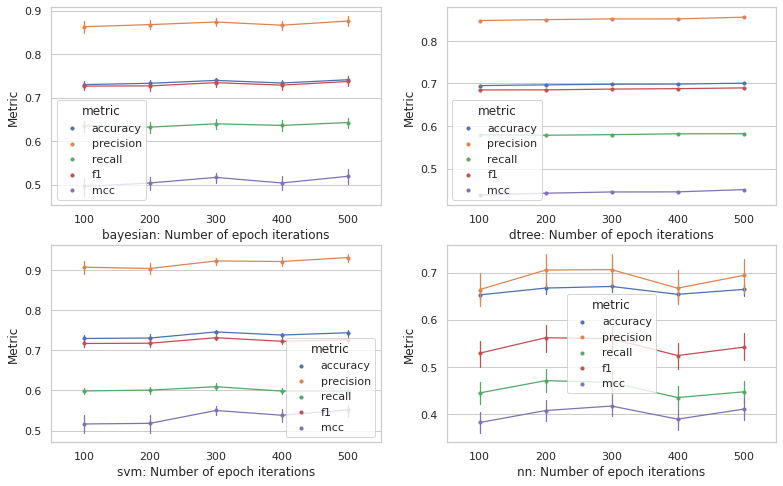

In [10]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='epochs',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of epoch iterations', ylabel='Metric')

In [11]:
autos.groupby('epochs').mean()

,accuracy,precision,recall,f1,mcc
epochs,,,,,
100,0.694180,0.840975,0.574746,0.679081,0.437505
200,0.696517,0.844683,0.574842,0.680750,0.442770
300,0.698324,0.846730,0.576177,0.682639,0.446508
400,0.697735,0.844873,0.576430,0.681807,0.445141
500,0.700356,0.850077,0.577254,0.684404,0.451333


In [12]:
maldf = maldf[~(maldf['dimred'].str.contains('autoencoder') & ~maldf['dimred'].str.contains('coder_4'))]

In [13]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))
autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

number of autoencoded 10764


/tmp/ipykernel_2972119/1871244389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = (autos.dimred.str.extract(r'autoencoder_(\d*)').astype('int') + 1) *  100
/tmp/ipykernel_2972119/1871244389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [14]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

bayesian
dtree
svm
nn


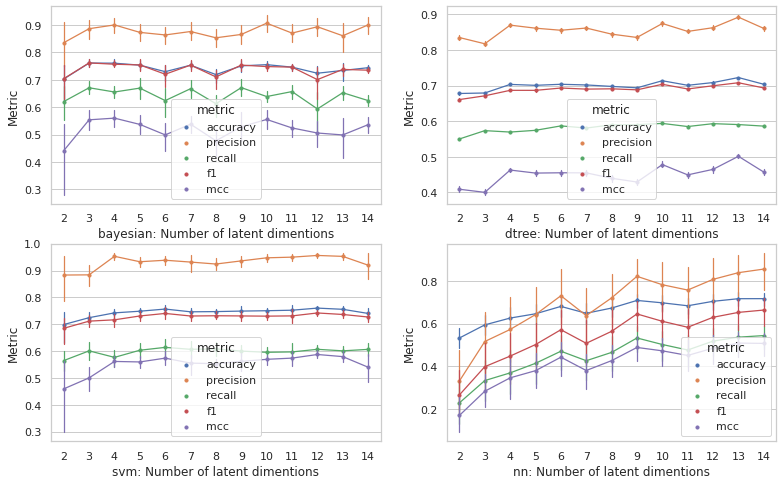

In [15]:
fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='latdim',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': Number of latent dimentions', ylabel='Metric')

In [16]:
autos.groupby('latdim').mean()

,accuracy,precision,recall,f1,mcc,epochs
latdim,,,,,,
10,0.714252,0.872094,0.590607,0.700811,0.480454,500.0
11,0.701677,0.849886,0.581656,0.687386,0.452346,500.0
12,0.709485,0.862229,0.590201,0.697318,0.468177,500.0
13,0.723166,0.890552,0.589391,0.706594,0.502986,500.0
14,0.705587,0.861993,0.585356,0.693350,0.461779,500.0
2,0.672343,0.813895,0.537488,0.644689,0.399821,500.0
3,0.677529,0.806460,0.564993,0.661453,0.398883,500.0
4,0.701547,0.858726,0.562271,0.677906,0.460690,500.0
5,0.699992,0.853112,0.569351,0.680368,0.453896,500.0


bayesian
dtree
svm
nn


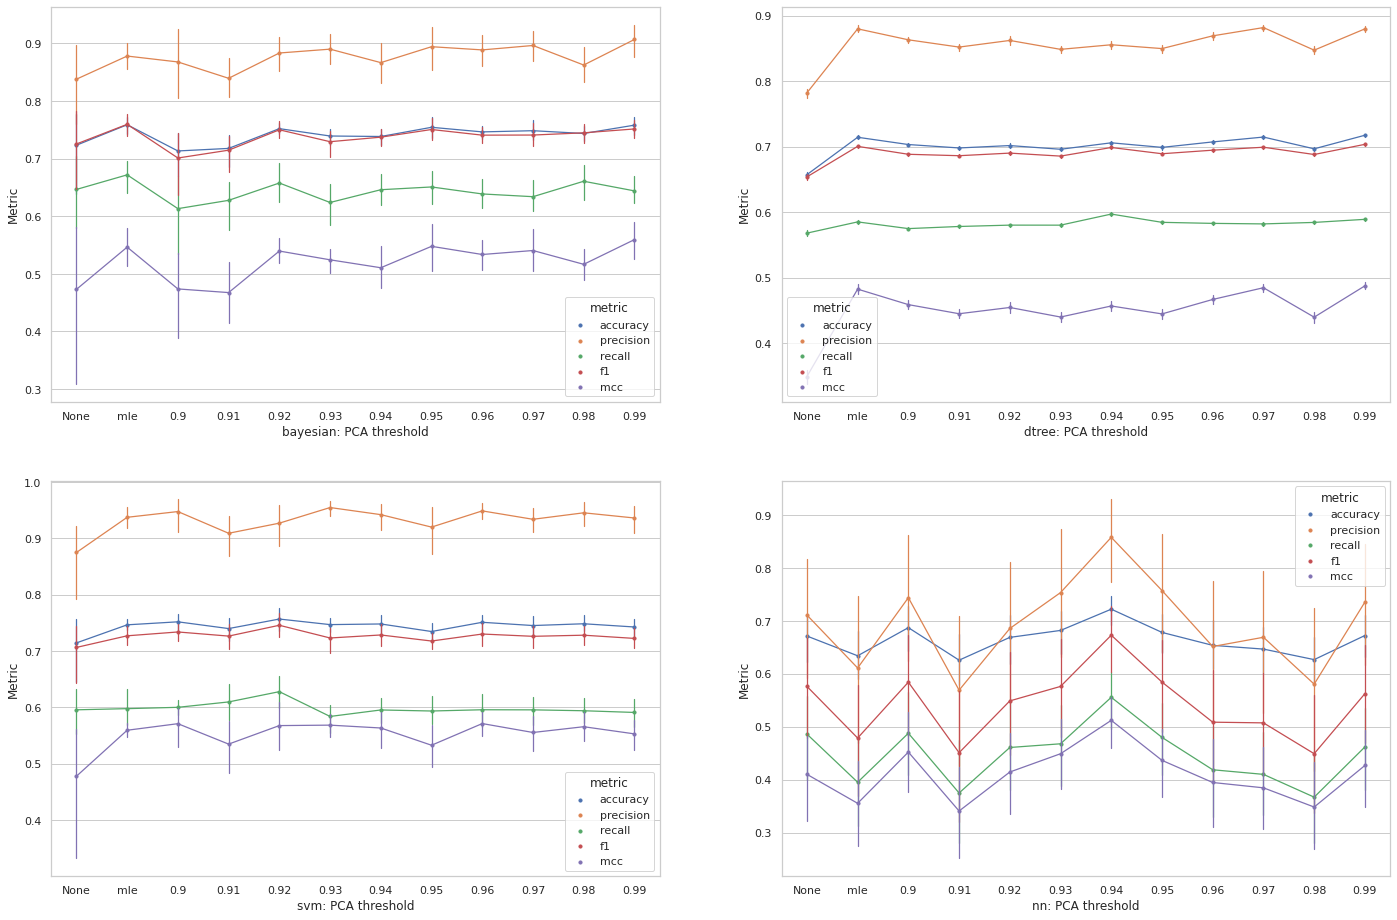

In [17]:
fig = plt.figure(figsize=(24,16))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=amelt[amelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')

In [18]:
autos.groupby('pca').mean()

,accuracy,precision,recall,f1,mcc,epochs
pca,,,,,,
0.9,0.703199,0.859032,0.571851,0.684484,0.460207,500.0
0.91,0.695588,0.840158,0.570286,0.676769,0.441850,500.0
0.92,0.701568,0.855529,0.576639,0.685488,0.455437,500.0
0.93,0.696581,0.846368,0.575776,0.681810,0.443201,500.0
0.94,0.707469,0.856879,0.595781,0.698406,0.461315,500.0
0.95,0.699123,0.847188,0.580821,0.685752,0.446897,500.0
0.96,0.705922,0.860956,0.576548,0.687529,0.465901,500.0
0.97,0.712451,0.873317,0.575350,0.691593,0.481944,500.0
0.98,0.694892,0.837158,0.575947,0.678856,0.438471,500.0


## PCA


In [19]:
pcas = maldf[maldf.dimred.str.match(r'pca_with_varthresh_[^_]*$')]
print('number of pcad', len(pcas))
pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')

pmelt = pcas.melt(id_vars=['dimred', 'modeltype', 'pca'],
                   var_name='metric', value_name='value')
pcas = maldf[maldf.dimred.str.match(r'pca_with_varthresh_[^_]*$')]
print('number of pcad', len(pcas))
pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')

pmelt = pcas.melt(id_vars=['dimred', 'modeltype', 'pca'],
                   var_name='metric', value_name='value')


number of pcad 760
number of pcad 760


/tmp/ipykernel_2972119/634887023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')
/tmp/ipykernel_2972119/634887023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcas['pca'] = pcas.dimred.str.extract(r'pca_with_varthresh_([^_]*)')


bayesian
dtree
svm
nn


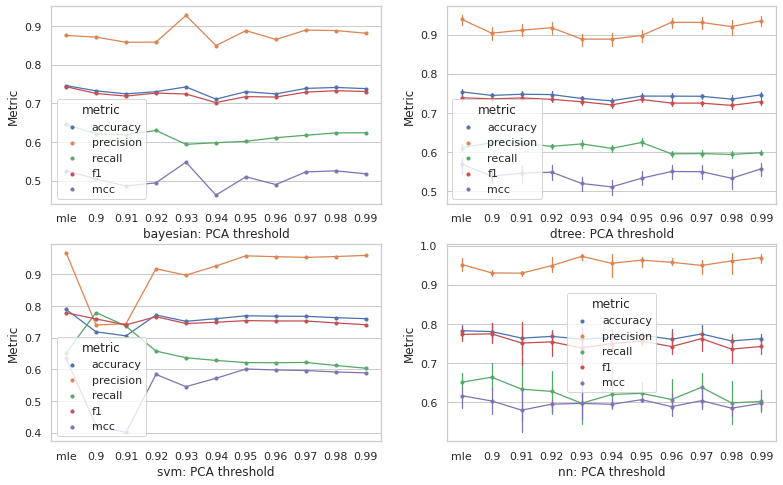

In [20]:

fig = plt.figure(figsize=(13,8))
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
modtype = ['bayesian', 'dtree', 'svm', 'nn']
for i in range(4):
    mod = modtype[i]
    print(mod)
    ax = fig.add_subplot(2, 2, i + 1)
    sns.pointplot(data=pmelt[pmelt['modeltype'].str.contains(mod)],
                  x='pca',
                  y='value',
                  hue='metric',
                  ax=ax)
    ax.set(xlabel=mod + ': PCA threshold', ylabel='Metric')


# ML metric comparison

## Baysian Network

In [21]:
bayes = maldf[maldf['modeltype'] == 'bayesian']
bayes['drtype'] = bayes['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
bayes

/tmp/ipykernel_2972119/4177646471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes['drtype'] = bayes['dimred']\


,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
2508,none,bayesian,0.451694,0.513249,0.712382,0.596639,-0.219382,none
2833,autoencoder_4_2,bayesian,0.332860,0.411015,0.397179,0.403979,-0.353314,autoencoder
3158,autoencoder_4_3,bayesian,0.799326,0.924752,0.704824,0.799947,0.628495,autoencoder
3483,autoencoder_4_4,bayesian,0.772844,0.939681,0.642173,0.762950,0.596926,autoencoder
3808,autoencoder_4_5,bayesian,0.810282,0.853437,0.804956,0.828488,0.617966,autoencoder
...,...,...,...,...,...,...,...,...
52623,pca_with_varthresh_0.99_autoencoder_4_10,bayesian,0.782292,0.934532,0.664069,0.776421,0.607980,pca_autoencoder
52948,pca_with_varthresh_0.99_autoencoder_4_11,bayesian,0.779143,0.953255,0.643575,0.768386,0.612696,pca_autoencoder
53273,pca_with_varthresh_0.99_autoencoder_4_12,bayesian,0.761666,0.973230,0.597756,0.740623,0.598170,pca_autoencoder
53598,pca_with_varthresh_0.99_autoencoder_4_13,bayesian,0.763086,0.952963,0.614120,0.746908,0.589833,pca_autoencoder


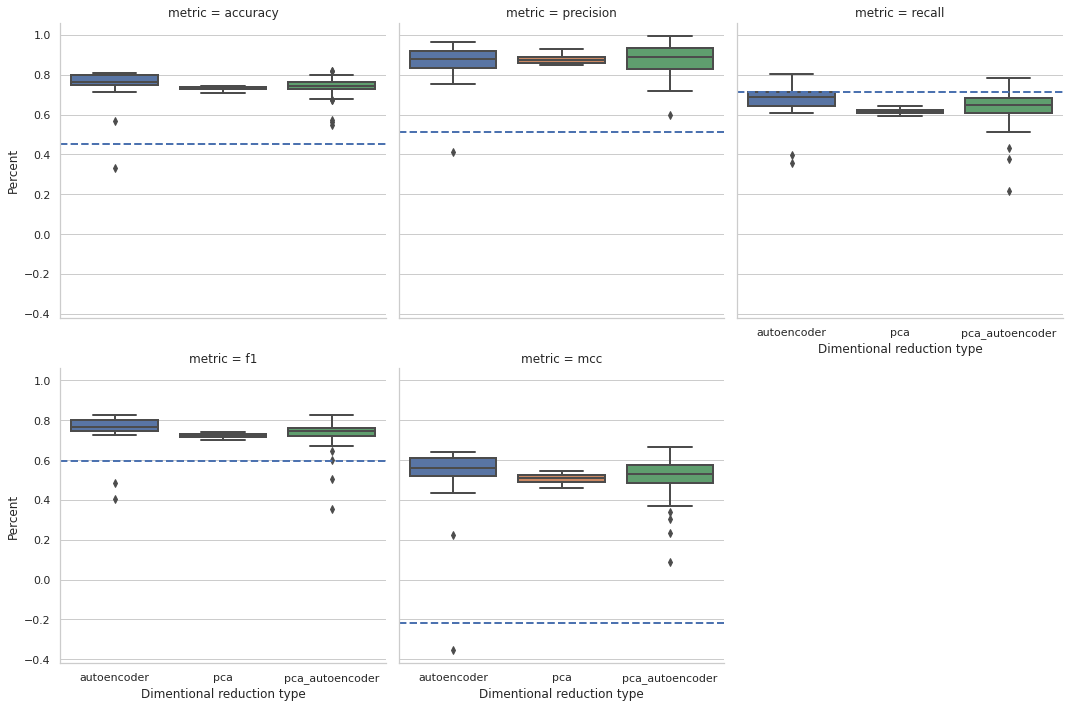

In [22]:
baymelt = bayes[bayes.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
baymelt['value'] = pd.to_numeric(baymelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=baymelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = bayes[bayes.drtype == 'none']
for a in ax.axes:
    b = base[(a.title.get_text().split(' = ')[1])].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [23]:
bayes.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.723191,0.837762,0.646452,0.725340,0.473070
none,0.451694,0.513249,0.712382,0.596639,-0.219382
pca,0.732330,0.877269,0.616507,0.723885,0.507553
pca_autoencoder,0.742677,0.879289,0.642516,0.738123,0.523627


In [24]:
bayes[bayes.groupby('drtype', sort=False)['accuracy'].transform(max) == bayes['accuracy']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
2508,none,bayesian,0.451694,0.513249,0.712382,0.596639,-0.219382,none
3808,autoencoder_4_5,bayesian,0.810282,0.853437,0.804956,0.828488,0.617966,autoencoder
6798,pca_with_varthresh_mle,bayesian,0.745697,0.875423,0.645056,0.742788,0.525569,pca
42093,pca_with_varthresh_0.97_autoencoder_4_4,bayesian,0.821505,0.937258,0.735681,0.824326,0.667928,pca_autoencoder


In [25]:
def calc_diff(x,met):
    samemodel = bayes['modeltype']==x['modeltype']
    basemet = bayes[samemodel & (bayes['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972119/1409954280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes[met + '_diff'] = bayes.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


In [26]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca,pca_autoencoder
accuracy_diff,0.271496,0.0,0.280635,0.290982
precision_diff,0.324512,0.0,0.364020,0.366039
recall_diff,-0.065930,0.0,-0.095875,-0.069866
f1_diff,0.128701,0.0,0.127246,0.141484
mcc_diff,0.692453,0.0,0.726935,0.743009


In [27]:
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(bayes[['drtype', 'dimred', met + '_diff']].groupby('drtype').max())

                                                 dimred  accuracy_diff
drtype                                                                
autoencoder                             autoencoder_4_9       0.358588
none                                               none       0.000000
pca                              pca_with_varthresh_mle       0.294003
pca_autoencoder  pca_with_varthresh_mle_autoencoder_4_9       0.369810
                                                 dimred  precision_diff
drtype                                                                 
autoencoder                             autoencoder_4_9        0.451142
none                                               none        0.000000
pca                              pca_with_varthresh_mle        0.413975
pca_autoencoder  pca_with_varthresh_mle_autoencoder_4_9        0.480933
                                                 dimred  recall_diff
drtype                                                              
auto

### SVM_RBF

In [28]:
svms = maldf[maldf['modeltype'].str.contains('svm_rbf')]
svms['drtype'] = svms['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
print(svms)

                                         dimred modeltype  accuracy  \
2376                                       none   svm_rbf  0.762952   
2381                            autoencoder_4_2   svm_rbf  0.339780   
2386                            autoencoder_4_3   svm_rbf  0.720192   
2391                            autoencoder_4_4   svm_rbf  0.779853   
2396                            autoencoder_4_5   svm_rbf  0.769562   
...                                         ...       ...       ...   
54628  pca_with_varthresh_0.99_autoencoder_4_10   svm_rbf  0.764505   
54633  pca_with_varthresh_0.99_autoencoder_4_11   svm_rbf  0.733100   
54638  pca_with_varthresh_0.99_autoencoder_4_12   svm_rbf  0.746496   
54643  pca_with_varthresh_0.99_autoencoder_4_13   svm_rbf  0.728132   
54648  pca_with_varthresh_0.99_autoencoder_4_14   svm_rbf  0.717131   

       precision    recall        f1       mcc           drtype  
2376    0.965213  0.605392  0.744086  0.595881             none  
2381    0.41601

/tmp/ipykernel_2972119/3986701597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms['drtype'] = svms['dimred']\


accuracy
precision
recall
f1
mcc


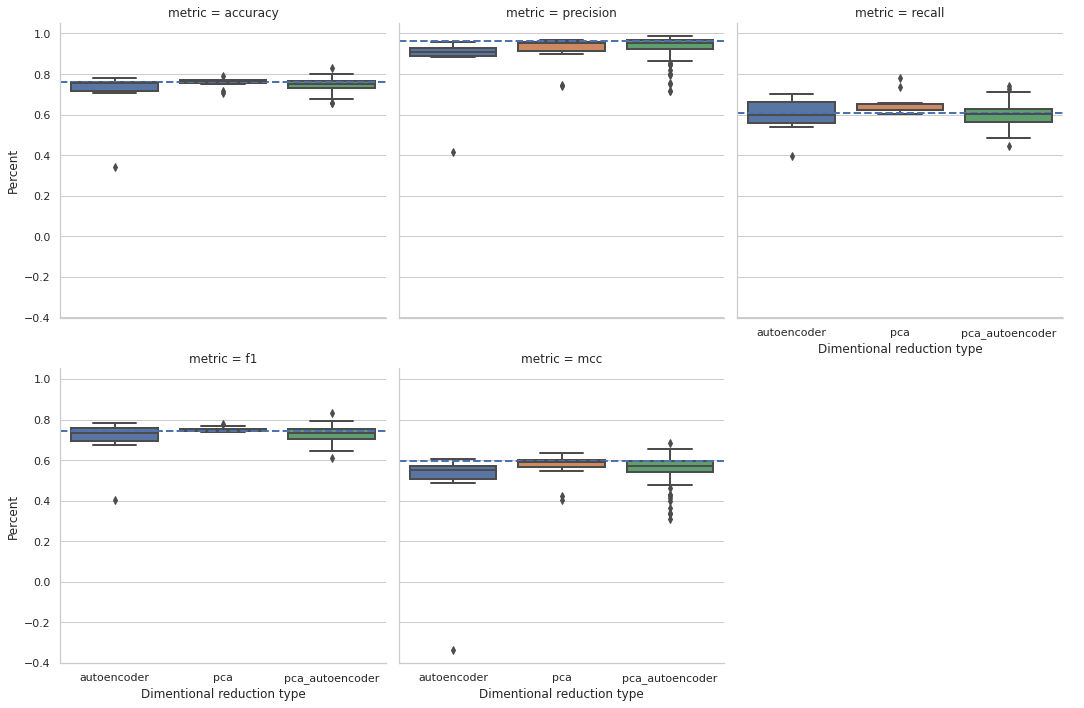

In [29]:
svmmelt = svms[svms.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
svmmelt['value'] = pd.to_numeric(svmmelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=svmmelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = svms[svms.drtype == 'none']
for a in ax.axes:
    print(a.title.get_text().split(' = ')[1])
    b = base[a.title.get_text().split(' = ')[1]].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [30]:
svms.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.714531,0.874965,0.595808,0.706502,0.477950
none,0.762952,0.965213,0.605392,0.744086,0.595881
pca,0.757700,0.911281,0.649095,0.753121,0.561174
pca_autoencoder,0.746635,0.936572,0.598734,0.728224,0.558588


In [31]:
svms[svms.groupby('drtype', sort=False)['mcc'].transform(max) == svms['mcc']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype
2376,none,svm_rbf,0.762952,0.965213,0.605392,0.744086,0.595881,none
2391,autoencoder_4_4,svm_rbf,0.779853,0.933752,0.660095,0.773431,0.604059,autoencoder
2442,pca_with_varthresh_mle,svm_rbf,0.789257,0.968576,0.650900,0.778580,0.634754,pca
54145,pca_with_varthresh_0.92_autoencoder_4_6,svm_rbf,0.828070,0.946555,0.739733,0.830461,0.682102,pca_autoencoder


In [32]:
def calc_diff(x,met):
    samemodel = svms['modeltype']==x['modeltype']
    basemet = svms[samemodel & (svms['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972119/2102562361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms[met + '_diff'] = svms.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


In [33]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(svms[['drtype', 'dimred', met + '_diff']].groupby('drtype').mean().T)

agg

drtype,autoencoder,none,pca,pca_autoencoder
accuracy_diff,-0.048422,0.0,-0.005253,-0.016317
precision_diff,-0.090248,0.0,-0.053932,-0.028641
recall_diff,-0.009585,0.0,0.043702,-0.006658
f1_diff,-0.037584,0.0,0.009035,-0.015862
mcc_diff,-0.117931,0.0,-0.034707,-0.037293


## DTs

### variable tuning

In [34]:
dtrees = maldf[maldf['modeltype'].str.contains('dtree')]
dtrees['drtype'] = dtrees['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
dtrees['criterion'] = dtrees.modeltype.str.extract(r'dtree_([^_]*)_')
dtrees['splitter'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_([^_]*)_')
dtrees['min_samples_split'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_([^_]*)_')
dtrees['min_samples_leaf'] = dtrees.modeltype.str.extract(r'dtree_[^_]*_[^_]*_[^_]*_([^_]*)')

print(dtrees)

                                         dimred                 modeltype  \
2509                                       none       dtree_gini_best_2_1   
2510                                       none       dtree_gini_best_2_2   
2511                                       none       dtree_gini_best_2_3   
2512                                       none       dtree_gini_best_2_4   
2513                                       none       dtree_gini_best_4_1   
...                                         ...                       ...   
53983  pca_with_varthresh_0.99_autoencoder_4_14  dtree_entropy_random_6_4   
53984  pca_with_varthresh_0.99_autoencoder_4_14  dtree_entropy_random_8_1   
53985  pca_with_varthresh_0.99_autoencoder_4_14  dtree_entropy_random_8_2   
53986  pca_with_varthresh_0.99_autoencoder_4_14  dtree_entropy_random_8_3   
53987  pca_with_varthresh_0.99_autoencoder_4_14  dtree_entropy_random_8_4   

       accuracy  precision    recall        f1       mcc           drtype  

/tmp/ipykernel_2972119/847068698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['drtype'] = dtrees['dimred']\
/tmp/ipykernel_2972119/847068698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees['criterion'] = dtrees.modeltype.str.extract(r'dtree_([^_]*)_')
/tmp/ipykernel_2972119/847068698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

<AxesSubplot:xlabel='criterion', ylabel='mcc'>

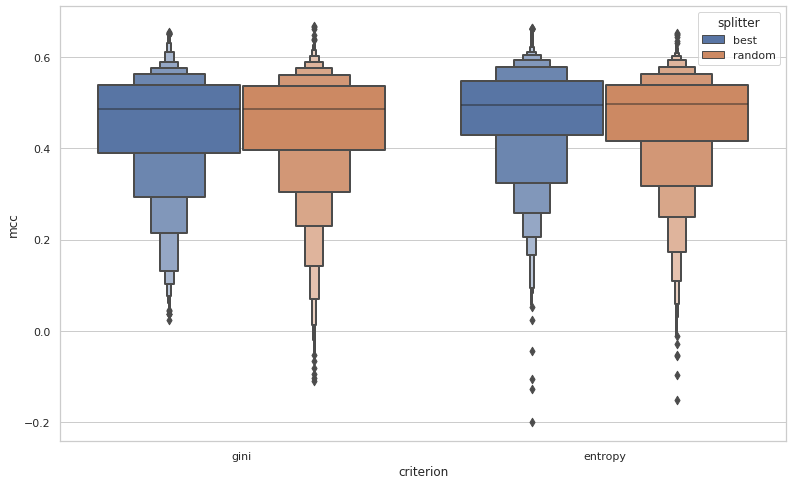

In [35]:
ax = plt.figure(figsize=(13,8))
sns.boxenplot(data=dtrees, x='criterion', y='mcc', hue='splitter')

In [36]:
dtrees.groupby(['criterion', 'splitter']).mean()

accuracy  precision    recall        f1       mcc
criterion splitter                                                   
entropy   best      0.709859   0.866854  0.588301  0.698318  0.469637
          random    0.704912   0.864927  0.581064  0.692235  0.461526
gini      best      0.700898   0.853313  0.586259  0.691347  0.449257
          random    0.700305   0.856001  0.581200  0.689116  0.450029

In [37]:
dtrees[dtrees.groupby(['criterion', 'splitter'])['mcc'].transform(max) == dtrees['mcc']][['criterion', 'splitter', 'dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc']]

,criterion,splitter,dimred,modeltype,accuracy,precision,recall,f1,mcc
2523,gini,best,none,dtree_gini_best_8_3,0.801677,0.972750,0.670381,0.793745,0.654712
2535,gini,random,none,dtree_gini_random_6_3,0.811081,0.970169,0.689317,0.805977,0.667231
2550,entropy,best,none,dtree_entropy_best_6_2,0.809351,0.967057,0.688537,0.804370,0.663211
2558,entropy,random,none,dtree_entropy_random_2_2,0.801411,0.968281,0.673186,0.794208,0.652169


In [38]:
dtrees.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.657054,0.781880,0.567772,0.653662,0.348900
none,0.788944,0.968040,0.650715,0.777893,0.634262
pca,0.742458,0.914989,0.609523,0.729549,0.540803
pca_autoencoder,0.704708,0.862438,0.583287,0.692882,0.459861


In [39]:
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(dtrees[dtrees[met] == dtrees[met].max()])

     dimred              modeltype  accuracy  precision    recall        f1  \
2535   none  dtree_gini_random_6_3  0.811081   0.970169  0.689317  0.805977   

           mcc drtype criterion splitter min_samples_split min_samples_leaf  
2535  0.667231   none      gini   random                 6                3  
     dimred                 modeltype  accuracy  precision    recall  \
2559   none  dtree_entropy_random_2_3  0.793382   0.981279  0.649419   

            f1       mcc drtype criterion splitter min_samples_split  \
2559  0.781581  0.646915   none   entropy   random                 2   

     min_samples_leaf  
2559                3  
                dimred            modeltype  accuracy  precision    recall  \
6092  autoencoder_4_12  dtree_gini_best_6_1  0.645094   0.671032  0.738643   

            f1       mcc       drtype criterion splitter min_samples_split  \
6092  0.703216  0.266283  autoencoder      gini     best                 6   

     min_samples_leaf  
6092     

In [40]:
def calc_diff(x,met):
    samemodel = dtrees['modeltype']==x['modeltype']
    basemet = dtrees[samemodel & (dtrees['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    dtrees[met + '_diff'] = dtrees.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972119/1350800160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtrees[met + '_diff'] = dtrees.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


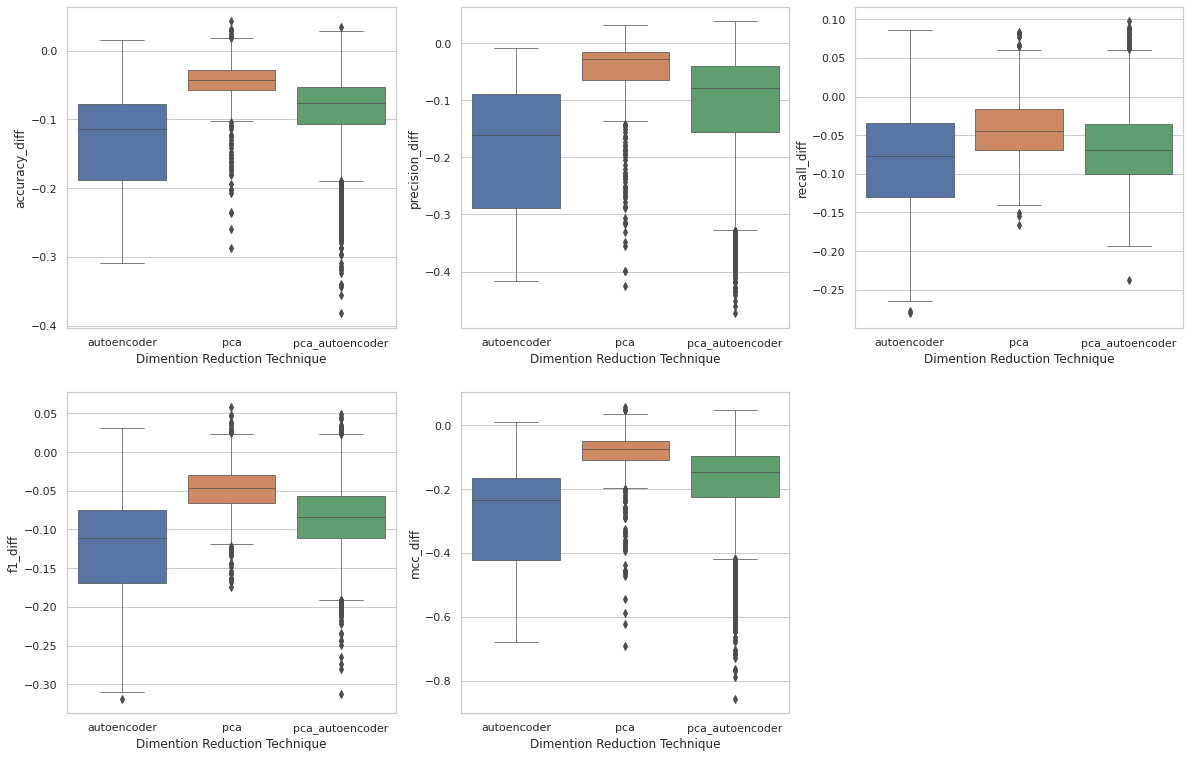

In [41]:
fig = plt.figure(figsize=(20,13))

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
for i in range(5):
    met = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=dtrees[dtrees['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    

In [42]:
agg = pd.DataFrame()
for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    agg = agg.append(dtrees[dtrees[met] == dtrees[met].max()])

agg

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,criterion,splitter,min_samples_split,min_samples_leaf,accuracy_diff,precision_diff,recall_diff,f1_diff,mcc_diff
2535,none,dtree_gini_random_6_3,0.811081,0.970169,0.689317,0.805977,0.667231,none,gini,random,6,3,0.000000,0.000000,0.00000,0.000000,0.000000
2559,none,dtree_entropy_random_2_3,0.793382,0.981279,0.649419,0.781581,0.646915,none,entropy,random,2,3,0.000000,0.000000,0.00000,0.000000,0.000000
6092,autoencoder_4_12,dtree_gini_best_6_1,0.645094,0.671032,0.738643,0.703216,0.266283,autoencoder,gini,best,6,1,-0.147933,-0.301431,0.08369,-0.079518,-0.375794
2535,none,dtree_gini_random_6_3,0.811081,0.970169,0.689317,0.805977,0.667231,none,gini,random,6,3,0.000000,0.000000,0.00000,0.000000,0.000000
2535,none,dtree_gini_random_6_3,0.811081,0.970169,0.689317,0.805977,0.667231,none,gini,random,6,3,0.000000,0.000000,0.00000,0.000000,0.000000


# Neural Nets

In [43]:
nns = maldf[maldf['modeltype'].str.contains('nn')]
nns['drtype'] = nns['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
nns['layers'] = nns.modeltype.str.extract(r'nn_([^_]*)')

print(nns)

                                        dimred modeltype  accuracy  precision  \
0                                         none      nn_1  0.777857   0.936128   
1                                         none      nn_3  0.769207   0.955468   
2                                         none      nn_5  0.783401   0.964478   
15                             autoencoder_4_2      nn_1  0.320662   0.404140   
16                             autoencoder_4_2      nn_3  0.430758   0.000000   
...                                        ...       ...       ...        ...   
2359  pca_with_varthresh_0.99_autoencoder_4_13      nn_3  0.737314   0.965137   
2360  pca_with_varthresh_0.99_autoencoder_4_13      nn_5  0.731946   0.914226   
2373  pca_with_varthresh_0.99_autoencoder_4_14      nn_1  0.727599   0.915549   
2374  pca_with_varthresh_0.99_autoencoder_4_14      nn_3  0.713804   0.921968   
2375  pca_with_varthresh_0.99_autoencoder_4_14      nn_5  0.713982   0.901623   

        recall        f1   

/tmp/ipykernel_2972119/696213306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns['drtype'] = nns['dimred']\
/tmp/ipykernel_2972119/696213306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns['layers'] = nns.modeltype.str.extract(r'nn_([^_]*)')


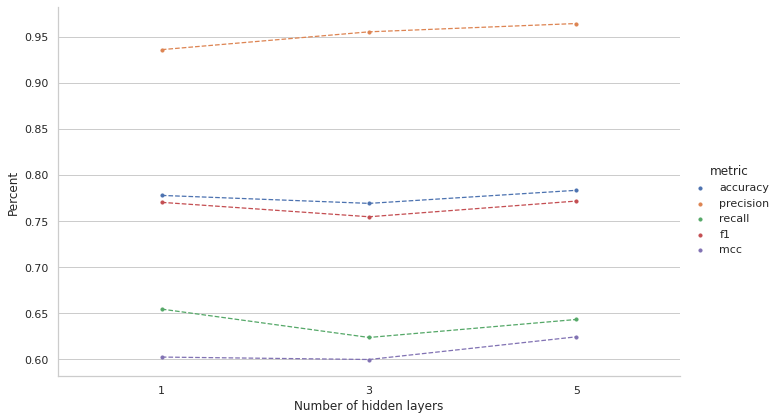

In [44]:
nnmelt = nns[nns.drtype == 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype', 'layers'],
                     var_name='metric', value_name='value')
nnmelt['value'] = pd.to_numeric(nnmelt['value'])

sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=nnmelt,
                 x='layers',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='Number of hidden layers', ylabel='Percent')

In [45]:
nns[nns.drtype == 'none'].groupby('layers').mean()

,accuracy,precision,recall,f1,mcc
layers,,,,,
1,0.777857,0.936128,0.654407,0.770317,0.602348
3,0.769207,0.955468,0.623627,0.754680,0.599708
5,0.783401,0.964478,0.643186,0.771726,0.624353


In [46]:
nns[nns['accuracy'] == nns['accuracy'].max()]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers
517,pca_with_varthresh_0.9_autoencoder_4_9,nn_3,0.814674,0.959541,0.704122,0.812225,0.667584,pca_autoencoder,3


In [47]:
nns[nns.groupby('layers', sort=False)['mcc'].transform(max) == nns['mcc']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers
197,autoencoder_4_14,nn_5,0.794757,0.976871,0.654952,0.784158,0.646723,autoencoder,5
517,pca_with_varthresh_0.9_autoencoder_4_9,nn_3,0.814674,0.959541,0.704122,0.812225,0.667584,pca_autoencoder,3
744,pca_with_varthresh_0.91_autoencoder_4_11,nn_1,0.809839,0.971842,0.685810,0.804148,0.666197,pca_autoencoder,1


In [48]:
nns.groupby('modeltype', sort=False).mean()

,accuracy,precision,recall,f1,mcc
modeltype,,,,,
nn_1,0.734045,0.891564,0.583503,0.702004,0.530839
nn_3,0.671376,0.711317,0.457078,0.554994,0.424491
nn_5,0.609417,0.534324,0.339150,0.413609,0.316295


In [49]:
def calc_diff(x,met):
    samemodel = nns['modeltype']==x['modeltype']
    basemet = nns[samemodel & (nns['dimred'] == 'none')][met].iloc[0]
    return x[met] - basemet

for met in  ['accuracy', 'precision', 'recall', 'f1', 'mcc']:
    print(met)
    nns[met + '_diff'] = nns.apply(lambda x: calc_diff(x, met), axis=1)

accuracy


/tmp/ipykernel_2972119/1221263587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nns[met + '_diff'] = nns.apply(lambda x: calc_diff(x, met), axis=1)


precision
recall
f1
mcc


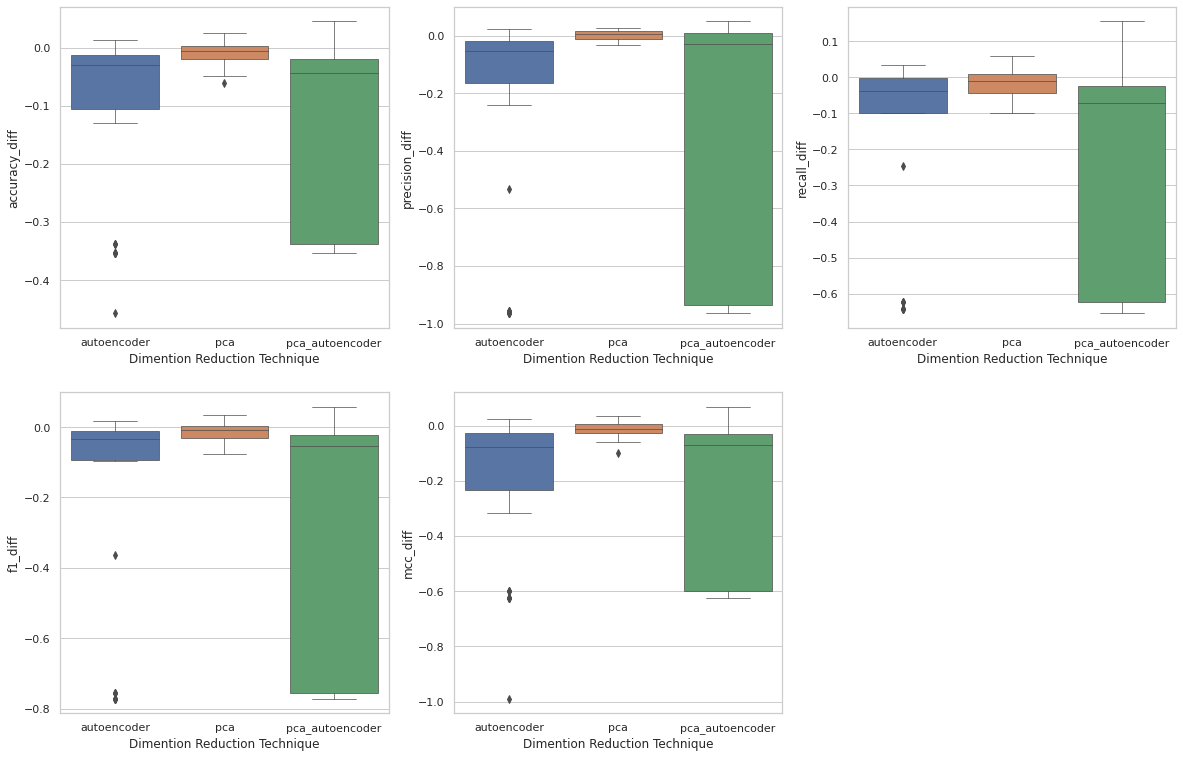

In [50]:
fig = plt.figure(figsize=(20,13))
for i in range(5):
    met = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff', 'mcc_diff'][i]
    ax = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(data=nns[nns['drtype'] != 'none'], x='drtype', y=met)
    ax.set(xlabel='Dimention Reduction Technique')
    

In [51]:
nns[nns.groupby('drtype', sort=False)['accuracy'].transform(max) == nns['accuracy']]

,dimred,modeltype,accuracy,precision,recall,f1,mcc,drtype,layers,accuracy_diff,precision_diff,recall_diff,f1_diff,mcc_diff
2,none,nn_5,0.783401,0.964478,0.643186,0.771726,0.624353,none,5,0.000000,0.000000,0.000000,0.000000,0.000000
197,autoencoder_4_14,nn_5,0.794757,0.976871,0.654952,0.784158,0.646723,autoencoder,5,0.011356,0.012394,0.011767,0.012432,0.022371
398,pca_with_varthresh_0.9,nn_5,0.803185,0.937748,0.700771,0.802123,0.640304,pca,5,0.019784,-0.026730,0.057586,0.030396,0.015951
517,pca_with_varthresh_0.9_autoencoder_4_9,nn_3,0.814674,0.959541,0.704122,0.812225,0.667584,pca_autoencoder,3,0.045467,0.004073,0.080496,0.057545,0.067875
